In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use("ggplot")

In [38]:
#Load the data

ncl = pd.read_excel("/content/Raw_data.xlsx", sheet_name = "NewCustomerList")

<ipython-input-38-161f30e4fc88>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  ncl = pd.read_excel("/content/Raw_data.xlsx", sheet_name = "NewCustomerList")


In [39]:
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [40]:
#checking the data information
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [41]:
print("Number of rows in the dataset: ", ncl.shape[0])
print("\n")
print("Number of columns in the dataset: ", ncl.shape[1])

Number of rows in the dataset:  1000


Number of columns in the dataset:  23


In [42]:
#Let's remove the unnecessary columns

ncl.drop(labels = ["Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], axis = 1, inplace = True)

In [43]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [44]:
#Bifurcate the numerical and categorical columns

num_cols = ncl.select_dtypes(include = "number")
print("Numerical columns are: ", num_cols.columns.values)
print("\n")
cat_cols = ncl.select_dtypes(exclude = "number")
print("Categorical columns are: ", cat_cols.columns.values)

Numerical columns are:  ['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Rank' 'Value']


Categorical columns are:  ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


In [45]:
#Check missing values now

ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [46]:
#checking percentage of missing values

In [47]:
ncl.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In [48]:
#Let's start with last name column

ncl["last_name"].isnull().mean()*100

2.9000000000000004

In [49]:
#last name missing data is 3% so we can fill it with non

ncl["last_name"].fillna("None", axis = 0, inplace = True)

In [50]:
ncl["last_name"].isnull().sum()

0

In [51]:
#Let's work on DOB column

ncl["DOB"].isnull().mean()*100

1.7000000000000002

In [52]:
#DOB missing data is 2% which can be removed

age_drop = ncl[ncl["DOB"].isnull()].index
ncl.drop(index = age_drop, axis = 0, inplace = True)

In [53]:
ncl["DOB"].isnull().sum()

0

In [54]:
#Let's work on job_title column
ncl["job_title"].isnull().sum()

105

In [55]:
ncl["job_title"].isnull().mean()*100

10.681586978636826

In [56]:
#since the data is more than 10% so let's fill the missing values with Missing

ncl["job_title"].fillna("Missing", axis = 0, inplace = True)

In [57]:
ncl["job_title"].isnull().sum()

0

In [58]:
#Let's work on job_title column
ncl["job_industry_category"].isnull().sum()

165

In [59]:
ncl["job_industry_category"].isnull().mean()*100

16.7853509664293

In [60]:
#since the data is more than 16% so let's fill the missing values
ncl["job_industry_category"].fillna("Missing", axis = 0, inplace = True)
ncl["job_industry_category"].isnull().sum()

0

In [61]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            983 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            983 non-null    object        
 6   job_industry_category                983 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure        

In [62]:
#now we don't have any missing value

In [63]:
#Creating age column to check further descripency in data

#function to find age of customers of today

def age(born):
  today = date.today()

  return today.year - born.year - ((today.month, today.day) > (born.month, born.day))

ncl["Age"] = ncl["DOB"].apply(age)

In [64]:
ncl["Age"].describe()

count    983.000000
mean      53.034588
std       17.097564
min       21.000000
25%       41.000000
50%       52.000000
75%       67.000000
max       86.000000
Name: Age, dtype: float64

<ipython-input-65-30c7091351be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ncl["Age"], kde = False, bins = 50)


<Axes: xlabel='Age'>

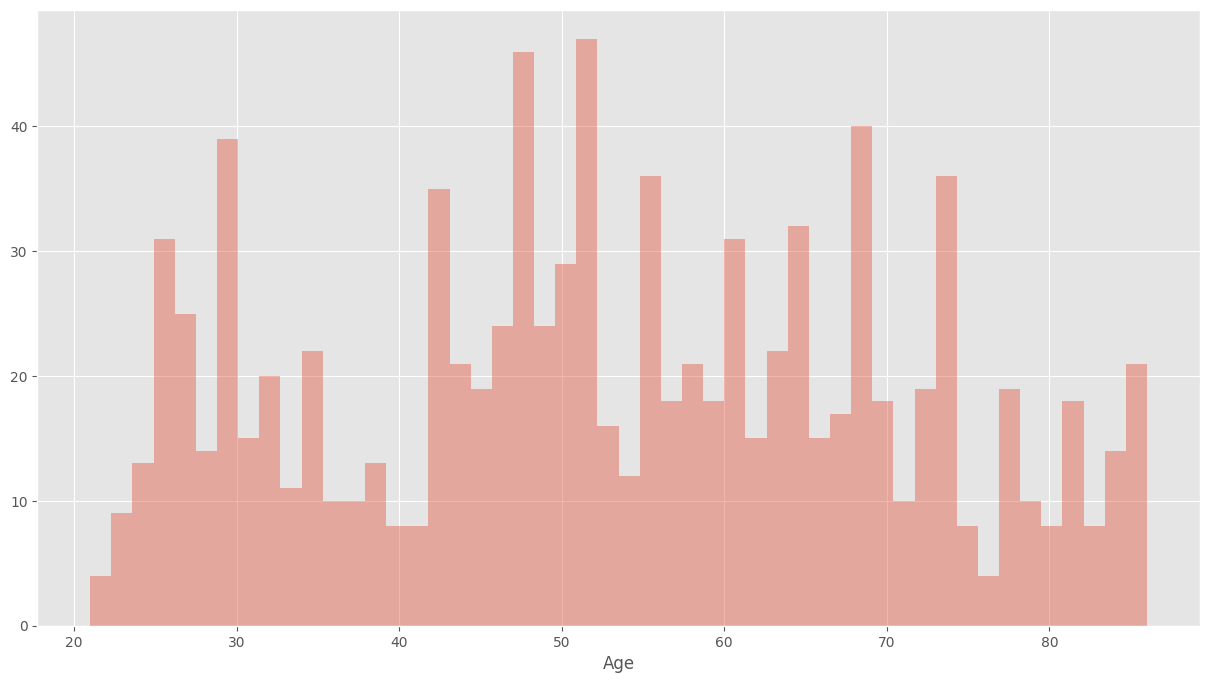

In [65]:
#visualization to find out age decripency
plt.figure(figsize = (15,8))
sns.distplot(ncl["Age"], kde = False, bins = 50)

In [66]:
#Looking at the graph, seems no decripency in the data

In [71]:
import math

In [72]:
#Creating age group column

ncl["Age Group"] = ncl["Age"].apply(lambda x : (math.floor(x/10)+1)*10)

<ipython-input-73-87020fc4ca55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ncl["Age Group"], kde = False, bins = 50)


<Figure size 1500x800 with 0 Axes>

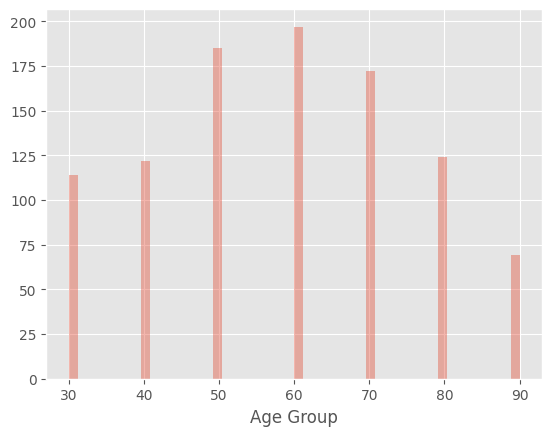

<Figure size 1500x800 with 0 Axes>

In [73]:
sns.distplot(ncl["Age Group"], kde = False, bins = 50)
plt.figure(figsize = (15,8))

In [74]:
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,67,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,54,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50,60
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,59,60


In [ ]:
#Now, let's check data inconsitency in the columns - gender, wealth_segment, deceased_indicator, owns_car

In [75]:
ncl["gender"].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

In [76]:
ncl["wealth_segment"].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

In [77]:
ncl["deceased_indicator"].value_counts()

N    983
Name: deceased_indicator, dtype: int64

In [78]:
ncl["owns_car"].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

In [79]:
ncl["postcode"].value_counts()

2232    9
2145    9
2750    7
2168    7
3029    7
       ..
3919    1
3142    1
3047    1
4116    1
4215    1
Name: postcode, Length: 515, dtype: int64

In [80]:
#Now, check for the duplicated data

ncl.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 983, dtype: bool

In [81]:
ncl.duplicated().sum()

0

In [82]:
ncl[ncl.duplicated()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group


In [ ]:
#Found no duplicated data, time to export the clean data

In [83]:
ncl.to_csv("New_Customer_List_cleaned.csv", index = False)